In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('prep.csv', sep=';')
df

,Retail_space_sq._m.,Rating_in_Google,Average_check,Average_income_of_the_population_UAH,The_average_population,Fast_food,Takeaway_coffee,Pizzeria,Main_street,Intra-quarter_road,Success
0,9.00,3.0,76.85,13884.0,3807.0,1.0,1.0,0.0,1.0,0.0,1
1,22.00,4.1,84.86,11700.0,9086.0,0.0,0.0,0.0,1.0,0.0,1
2,13.00,3.0,112.02,6786.0,6383.0,0.0,0.0,0.0,1.0,0.0,1
3,18.00,3.0,119.80,12948.0,4.0,1.0,1.0,1.0,1.0,0.0,1
4,25.00,4.0,94.88,11427.0,426.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
64,40.78,4.0,107.37,9399.0,12018.0,0.0,0.0,0.0,1.0,1.0,0
65,21.50,2.3,89.13,14079.0,10121.0,0.0,0.0,0.0,0.0,0.0,0
66,100.00,3.0,105.62,11427.0,7221.0,0.0,0.0,0.0,1.0,0.0,1
67,34.80,4.3,150.00,13338.0,3137.0,0.0,0.0,0.0,0.0,0.0,1


In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler().fit(df)
df = sc.transform(df)

In [4]:
X = df[:, [0,2,7]]

Выбрали значимые переменные.

In [5]:
#pip install SimpSOM

In [6]:
import SimpSOM as sps
np.random.seed(605891282)
net = sps.somNet(4, 4, X, PBC=True)
net.train(0.01, 10000)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method

Periodic Boundary Conditions active.
The weights will be initialised randomly.
Training SOM... done!


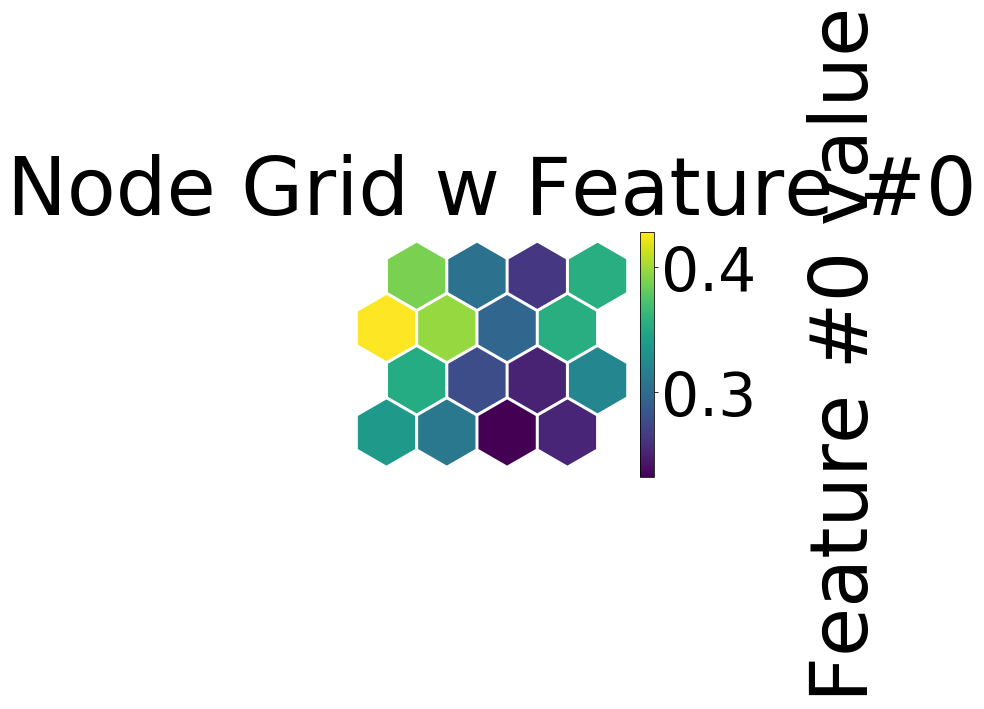

In [7]:
net.nodes_graph(colnum=0)
import matplotlib.pyplot as plt
plt.show()

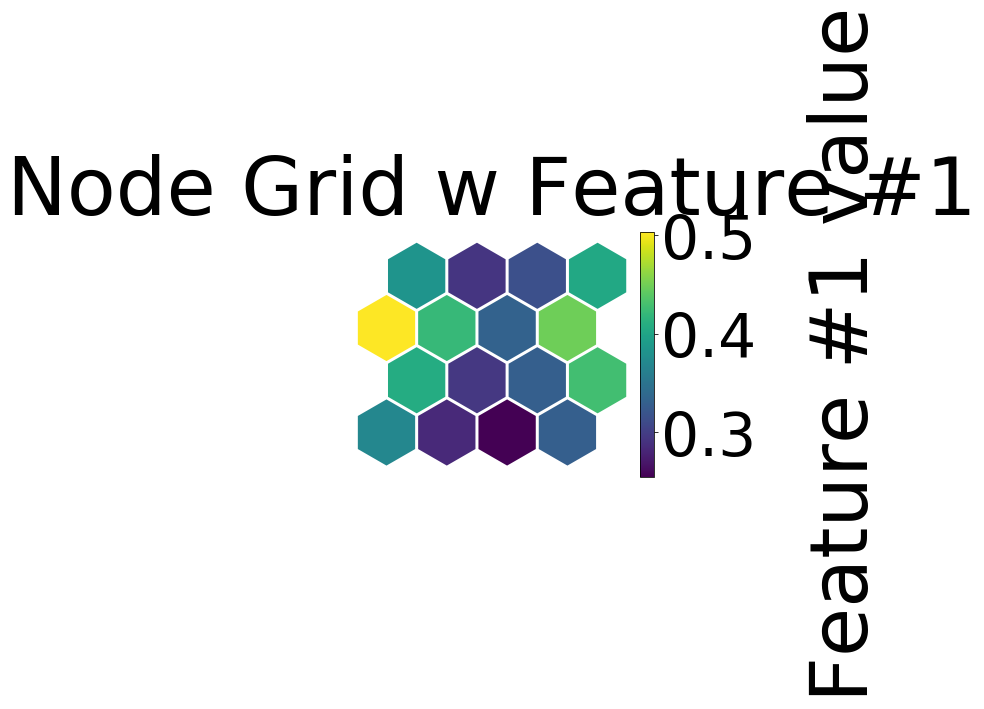

In [8]:
net.nodes_graph(colnum=1)
import matplotlib.pyplot as plt
plt.show()

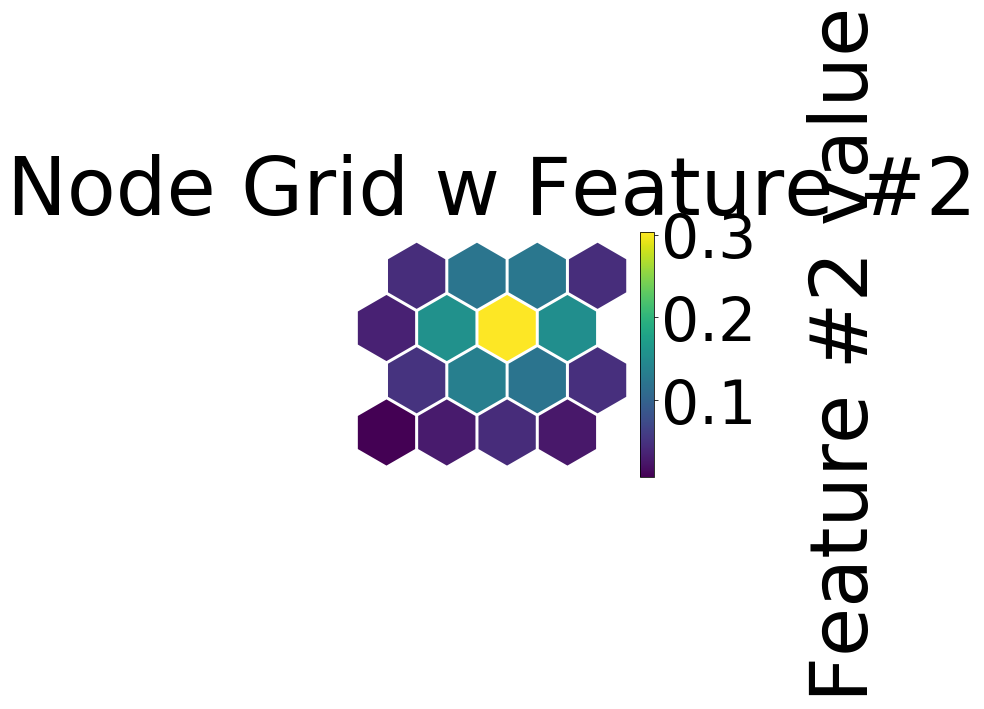

In [9]:
net.nodes_graph(colnum=2)
import matplotlib.pyplot as plt
plt.show()

Правый нижний угол карты соответсвует самой маленькой торговой площади и самому низкому среднему чеку. Также эта область имеет приближенную к средней оценке наличия пиццерии.

Левый верхний угол карты характеризиет торговые точки с большой пощадью и высоким показателем среднего чека. Эта часть торговых точек больше склонна к отсутствию пиццерий. 

Правый верхний угол отвечает средним значениям по площади и по чеку, а оценка наличия пиццерии в большей мере преобладает.

Левый нижний угол по своим характеристикам напоминает правый верхний угол. Можно предположить, что эти элементы похожи между собой.

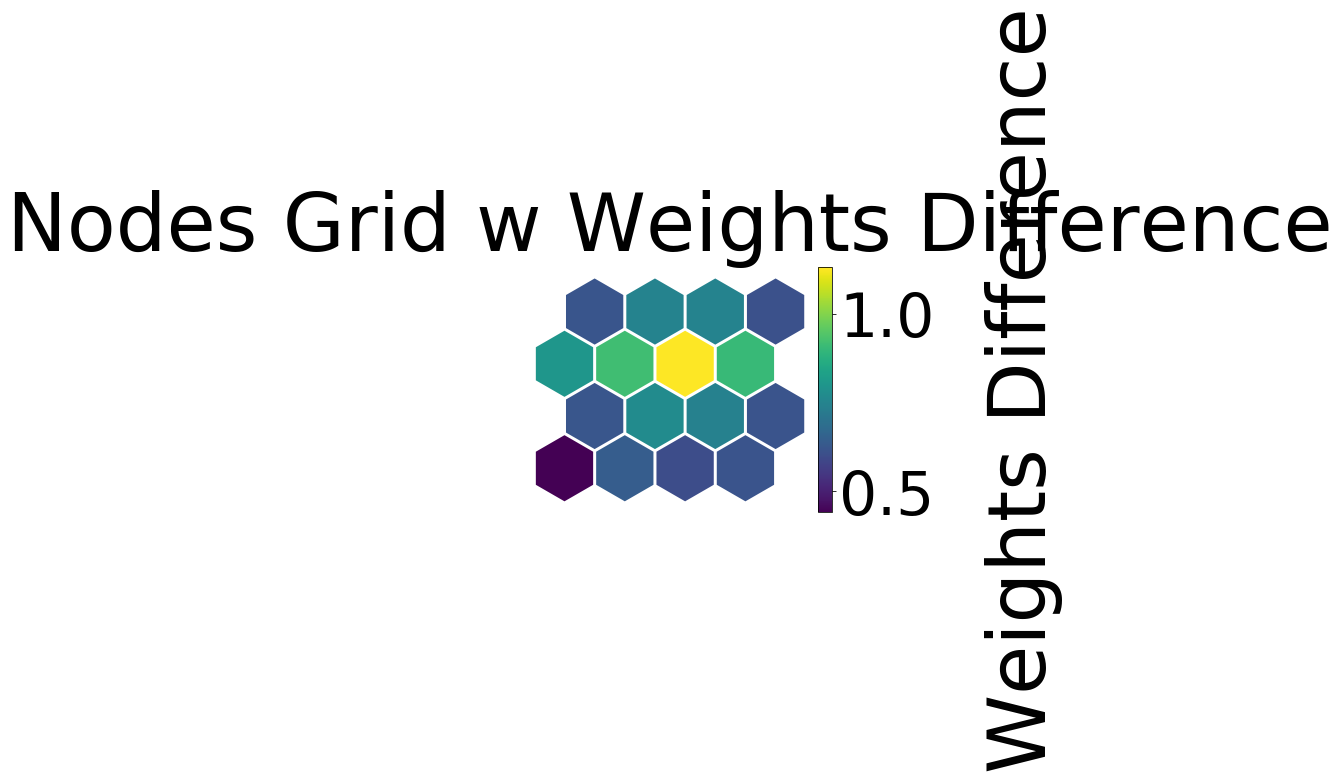

In [11]:
net.diff_graph()
plt.show()

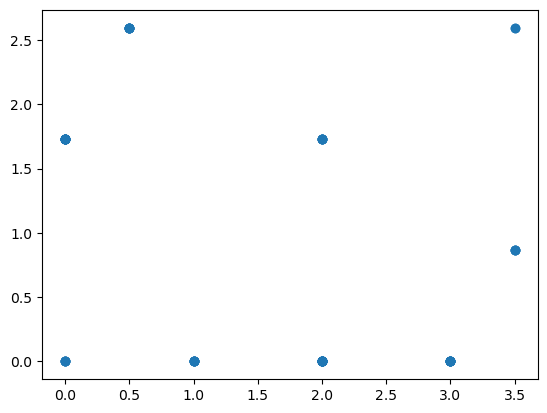

In [12]:
prj=np.array(net.project(X))
plt.scatter(prj.T[0],prj.T[1])
plt.show()

Думаю, можно выделить три кластера: правый нижний угол - заведения с маленькой площадью, низким чеком и скорее всего, без пиццерии; верхний левый угол - большая площадь, выше средний чек и тоже бес пиццерии; правый верхний угол и немного центра - заведения со средней площадью и чеком, но с преобладанием пиццерии.

In [15]:
from sklearn.cluster import KMeans
kmeans3 = KMeans(n_clusters=3, random_state=0).fit(prj)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/srv/conda/envs/notebook/lib/python3.7/site-

In [16]:
import pickle
input = open('clust.pkl', 'rb')
obj = pickle.load(input)
input.close()
hc_3 = obj["hc_3"]
km_3 = obj["km_3"]
km_var = obj["km_var"]

In [18]:
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(hc_3,kmeans3.labels_)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:123: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


-0.011629754527754669

In [19]:
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(km_3,kmeans3.labels_)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:123: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


0.5827163926119574

Видим хорошую сходимость модели К-средних с моделью SOM. Значит интерпретация, описанная выше, имеет место быть. Имеем деление на 3 кластера на основе значимых переменных. 